In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
import pickle
from sklearn import linear_model
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dt = pd.read_csv("/content/drive/MyDrive/Đồ án KPDLL/Code/heart.csv") #gọi thư viện dt đọc file csv
print(dt.shape) #in ra số dòng và số cột của bộ dữ liệu

(1116, 14)


In [ ]:
print (dt)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0     125.0   212  0.0        1    168.0    0.0      1.0   
1      53    1   0     140.0   203  1.0        0    155.0    1.0      3.1   
2      70    1   0     145.0   174  0.0        1    125.0    1.0      2.6   
3      61    1   0     148.0   203  0.0        1    161.0    0.0      0.0   
4      62    0   0     138.0   294  1.0        1    106.0    0.0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1111   59    1   1     140.0   221  0.0        1    164.0    1.0      0.0   
1112   60    1   0     125.0   258  0.0        0    141.0    1.0      2.8   
1113   47    1   0     110.0   275  0.0        0    118.0    1.0      1.0   
1114   50    0   0     110.0   254  0.0        0    159.0    0.0      0.0   
1115   54    1   0     120.0   188  0.0        1    113.0    0.0      1.4   

      slope   ca  thal  target  
0       2.0  2.0   3.0       0  
1       0

In [ ]:
dt.head(10) # hiện 10 dòng đầu của df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0.0,1,168.0,0.0,1.0,2.0,2.0,3.0,0
1,53,1,0,140.0,203,1.0,0,155.0,1.0,3.1,0.0,0.0,3.0,0
2,70,1,0,145.0,174,0.0,1,125.0,1.0,2.6,0.0,0.0,3.0,0
3,61,1,0,148.0,203,0.0,1,161.0,0.0,0.0,2.0,1.0,3.0,0
4,62,0,0,138.0,294,1.0,1,106.0,0.0,1.9,1.0,3.0,2.0,0
5,58,0,0,100.0,248,0.0,0,122.0,0.0,1.0,1.0,0.0,2.0,1
6,58,1,0,114.0,318,0.0,2,140.0,0.0,4.4,0.0,3.0,1.0,0
7,57,1,0,110.0,192,0.0,1,118.0,0.0,0.1,1.0,0.0,1.0,1
8,56,0,1,110.0,291,0.0,0,153.0,0.0,1.3,1.0,0.0,2.0,1
9,57,1,3,130.0,207,0.0,1,96.0,1.0,1.0,2.0,NaN,NaN,0


In [ ]:
dt.tail() #in ra những dòng cuối của dữ liệu

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1111,59,1,1,140.0,221,0.0,1,164.0,1.0,0.0,2.0,0.0,2.0,1
1112,60,1,0,125.0,258,0.0,0,141.0,1.0,2.8,1.0,1.0,3.0,0
1113,47,1,0,110.0,275,0.0,0,118.0,1.0,1.0,1.0,1.0,2.0,0
1114,50,0,0,110.0,254,0.0,0,159.0,0.0,0.0,2.0,0.0,2.0,1
1115,54,1,0,120.0,188,0.0,1,113.0,0.0,1.4,1.0,1.0,3.0,0


In [ ]:
dt.info() #in ra kiểu dữ liệu gì và có giá trị null hay không

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1116 non-null   int64  
 1   sex       1116 non-null   int64  
 2   cp        1116 non-null   int64  
 3   trestbps  1107 non-null   float64
 4   chol      1116 non-null   int64  
 5   fbs       1113 non-null   float64
 6   restecg   1116 non-null   int64  
 7   thalach   1108 non-null   float64
 8   exang     1108 non-null   float64
 9   oldpeak   1107 non-null   float64
 10  slope     1088 non-null   float64
 11  ca        1045 non-null   float64
 12  thal      1055 non-null   float64
 13  target    1116 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 122.2 KB


In [ ]:
dt.isnull().sum() #kiểm tra dữ liệu có cột nào null hay không?

age          0
sex          0
cp           0
trestbps     9
chol         0
fbs          3
restecg      0
thalach      8
exang        8
oldpeak      9
slope       28
ca          71
thal        61
target       0
dtype: int64

In [ ]:
df = dt.fillna(dt.mean()) #thay các giá trị null bằng giá gitri mean
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data = dt.dropna() #bỏ tất cả các dòng có giá trị null và chọn ra giá trị không null để khai phá
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
print(data.shape)

(1045, 14)


In [ ]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
data.duplicated()
data.duplicated().any()

True

In [ ]:
# Chọn lọc dữ liệu 

In [ ]:
# lọc dữ liệu age > 40
loc = data[ data['age'] > 40 ]
loc['target'].value_counts()



1    497
0    480
Name: target, dtype: int64

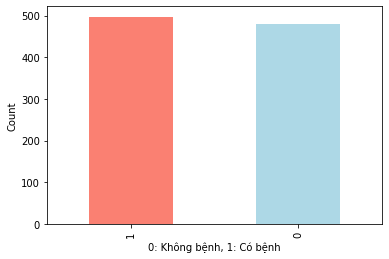

In [ ]:
loc['target'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: Không bệnh, 1: Có bệnh')
plt.ylabel('Count');

In [ ]:
pd.crosstab(loc['sex'], loc['target']) 

target,0,1
sex,,
0,87,217
1,393,280


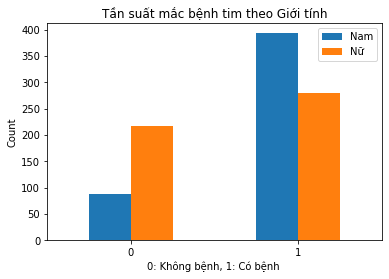

In [ ]:
pd.crosstab(loc['sex'], loc['target']).plot(kind='bar');
plt.title('Tần suất mắc bệnh tim theo Giới tính')
plt.xlabel('0: Không bệnh, 1: Có bệnh ')
plt.ylabel('Count')
plt.legend(['Nam', 'Nữ']);
plt.xticks(rotation=0);

In [ ]:
loc.sort_values('age', ascending=False) #sắp xếp dữ liệu từ cao đến thấp theo độ tuổi

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
457,77,1,0,125.0,304,0.0,0,162.0,1.0,0.0,2.0,3.0,2.0,0
211,77,1,0,125.0,304,0.0,0,162.0,1.0,0.0,2.0,3.0,2.0,0
213,77,1,0,125.0,304,0.0,0,162.0,1.0,0.0,2.0,3.0,2.0,0
605,76,0,2,140.0,197,0.0,2,116.0,0.0,1.1,1.0,0.0,2.0,1
1035,76,0,2,140.0,197,0.0,2,116.0,0.0,1.1,1.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,41,1,2,130.0,214,0.0,0,168.0,0.0,2.0,1.0,0.0,2.0,1
395,41,1,1,120.0,157,0.0,1,182.0,0.0,0.0,2.0,0.0,2.0,1
687,41,0,1,126.0,306,0.0,1,163.0,0.0,0.0,2.0,0.0,2.0,1
866,41,1,1,135.0,203,0.0,1,132.0,0.0,0.0,1.0,0.0,1.0,1


In [ ]:
data_clear=loc.drop_duplicates()
data_clear

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0.0,1,168.0,0.0,1.0,2.0,2.0,3.0,0
1,53,1,0,140.0,203,1.0,0,155.0,1.0,3.1,0.0,0.0,3.0,0
2,70,1,0,145.0,174,0.0,1,125.0,1.0,2.6,0.0,0.0,3.0,0
3,61,1,0,148.0,203,0.0,1,161.0,0.0,0.0,2.0,1.0,3.0,0
4,62,0,0,138.0,294,1.0,1,106.0,0.0,1.9,1.0,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,54,1,0,120.0,188,0.0,1,113.0,0.0,1.4,1.0,1.0,3.0,0
1067,63,1,0,130.0,251,0.0,0,117.0,0.0,1.1,1.0,1.0,3.0,0
1078,53,1,0,110.0,203,1.0,0,155.0,1.0,3.1,0.0,0.0,3.0,0
1095,63,1,0,110.0,187,0.0,0,111.0,1.0,1.0,2.0,2.0,3.0,0


In [ ]:
# có bao nhiêu ng mắc bệnh và không mắc bệnh(1 = có bệnh , 0 = không bệnh)
data_clear['target'].value_counts()

1    167
0    136
Name: target, dtype: int64

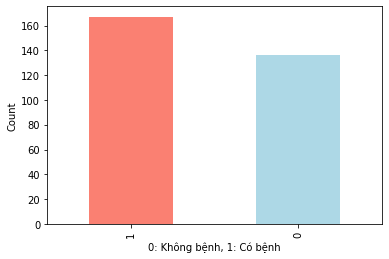

In [ ]:
data_clear['target'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: Không bệnh, 1: Có bệnh')
plt.ylabel('Count');

In [ ]:
data_clear.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
age,303.0,55.478548,8.073670,41.0,50.0,56.0,62.0,77.0
sex,303.0,0.673267,0.469794,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.963696,1.030336,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.419142,17.685794,94.0,120.0,130.0,140.0,200.0
chol,303.0,247.363036,51.514483,126.0,212.0,243.0,275.0,564.0
fbs,303.0,0.155116,0.362614,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.514851,0.526400,0.0,0.0,1.0,1.0,2.0
thalach,303.0,148.191419,22.616651,71.0,132.0,152.0,164.5,195.0
exang,303.0,0.330033,0.471003,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039274,1.144527,0.0,0.0,0.8,1.6,6.2


In [ ]:
#in ra giới tính (1: nam, 0: nữ)
data_clear['sex'].value_counts()

1    204
0     99
Name: sex, dtype: int64

In [ ]:
#tính toán bảng tần suất theo giới tính mang giá trị và hàm tổng hợp
pd.crosstab(data_clear['sex'], data_clear['target']) 


target,0,1
sex,,
0,25,74
1,111,93


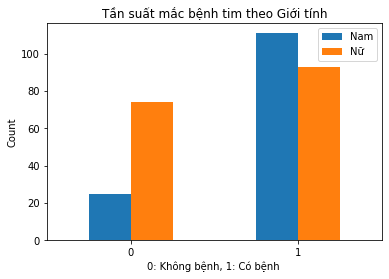

In [ ]:
pd.crosstab(data_clear['sex'], data_clear['target']).plot(kind='bar');
plt.title('Tần suất mắc bệnh tim theo Giới tính')
plt.xlabel('0: Không bệnh, 1: Có bệnh ')
plt.ylabel('Count')
plt.legend(['Nam', 'Nữ']);
plt.xticks(rotation=0);

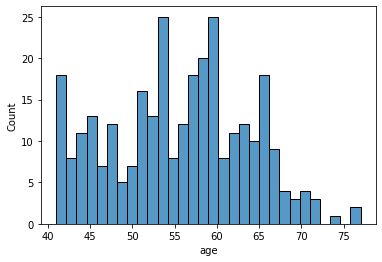

In [ ]:
# Hàm này có thể chuẩn hóa thống kê được tính toán trong mỗi ngăn để ước tính tần suất, mật độ hoặc khối lượng xác suất
# vẽ biểu đồ đơn biến hoặc đa biến
sns.histplot(data=data_clear, x=data_clear['age'],bins = 30);


In [ ]:
# giống như thuộc tính sex
pd.crosstab(data_clear['target'], dt['cp'])

cp,0,1,2,3
target,,,,
0,103,9,18,6
1,40,42,68,17


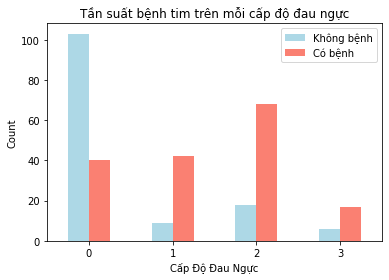

In [ ]:
# in ra mô hình trực quan hóa của tần suất bệnh tim trên mỗi cấp độ đau ngực
pd.crosstab(data_clear['cp'], data_clear['target']).plot(kind='bar', color=['lightblue', 'salmon']);

plt.title('Tần suất bệnh tim trên mỗi cấp độ đau ngực')
plt.xlabel('Cấp Độ Đau Ngực')
plt.ylabel('Count')
plt.legend(['Không bệnh', 'Có bệnh'])
plt.xticks(rotation=0);

In [ ]:
# The Model

In [ ]:
data_clear.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0.0,1,168.0,0.0,1.0,2.0,2.0,3.0,0
1,53,1,0,140.0,203,1.0,0,155.0,1.0,3.1,0.0,0.0,3.0,0


In [ ]:
# phân chia các tính năng và nhãn
X = data_clear.drop('target', axis=1) #13 cột độc lập và drop theo cột = 1 hoặc bằng colum
y = data_clear['target'] #biến mục tiêu

In [ ]:
# Chia tập dữ liệu train và test
# train_test_split tạo 4 phần dữ liệu sẽ được sử dụng để điều chỉnh và dự đoán các giá trị
# X_train sử dụng để huấn luyện mô hình và test_size = 0.2, lấy 80% dữ liệu để train và 20% còn lại để test
# X_test - Đây là 20% phần còn lại của dữ liệu sẽ không được sử dụng trong giai đoạn train và sẽ được sử dụng để đưa ra dự đoán nhằm kiểm tra độ chính xác của mô hình
# y_train các biến bao gồm các nhãn của mô hình khi train
# y_test là các nhãn trong quá trình test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# in ra kích thước của train và test (X,y)
Z = X_train.shape, X_test.shape, y_train.shape, y_test.shape
print ("Kích thước dữ liệu train và tets là :",Z)

Kích thước dữ liệu train và tets là : ((242, 13), (61, 13), (242,), (61,))


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression

models = {
    'Naive - Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
  
}

# tạo chức năng để phù hợp và mô hình
def fit_and_score(models, X_train, X_test, y_train, y_test):

    # thiết lập seed
    np.random.seed(42)
    
    # make dictonary to keep scores
    model_scores = {}
    
    # loop through models to fit and score
    for model_name, model in models.items():
        model.fit(X_train, y_train) # fit model
        score = model.score(X_test, y_test) # get score
        model_scores[model_name] = score # put score for each model
        
    return model_scores   

In [ ]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'Naive - Bayes': 0.7704918032786885, 'KNN': 0.7377049180327869}

In [1]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.head()

NameError: ignored

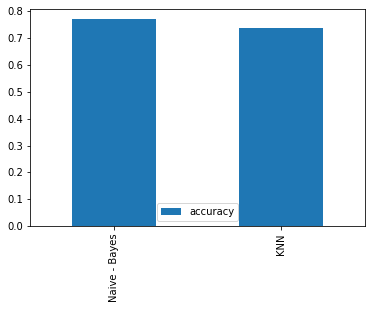

In [ ]:

model_compare.T.plot(kind='bar');

In [ ]:
# Dự đoán kết quả (đề mô)

In [ ]:
import csv
import random
import math
import sys

# Load data tu CSV file

def load_data(filename):
    lines = csv.reader(open(filename, "rt"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
        
    return dataset

# Phan chia tap du lieu theo class

def separate_data(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)

    return separated

# Phan chia tap du lieu thanh training va testing. Co the dung train_test_split

def split_data(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))

    return [trainSet, copy]

# tinh toan gia tri trung binh cua moi thuoc tinh

def mean(numbers):
    return sum(numbers) / float(len(numbers))

# Tinh toan do lech chuan cho tung thuoc tinh

def standard_deviation(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)

    return math.sqrt(variance)

# Gia tri trung binh , do lech chuan

def summarize(dataset):
    summaries = [(mean(attribute), standard_deviation(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]

    return summaries


def summarize_by_class(dataset):
    separated = separate_data(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)

    return summaries

# Tinh toan xac suat theo phan phoi Gause cua bien lien tuc
# http://sites.nicholas.duke.edu/statsreview/files/2013/06/normpdf1.jpg

def calculate_prob(x, mean, stdev):
    exponent = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))

    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

# Tinh xac suat cho moi thuoc tinh phan chia theo class
def calculate_class_prob(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculate_prob(x, mean, stdev)

    return probabilities

# Du doan vector thuoc phan lop nao

def predict(summaries, inputVector):
    probabilities = calculate_class_prob(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue

    return bestLabel

# Du doan tap du lieu testing thuoc vao phan lop nao

def get_predictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)

    return predictions

# Tinh toan do chinh xac cua phan lop

def get_accuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1

    return (correct / float(len(testSet))) * 100.0

def get_data_label(dataset):
    data = []
    label = []
    for x in dataset:
        data.append(x[:13])
        label.append(x[-1])

    return data, label

def main():
    filename = '/content/drive/MyDrive/Đồ án KPDLL/Code/5-dataset.csv'
    splitRatio = 0.8
    dataset = load_data(filename)
    trainingSet, testSet = split_data(dataset, splitRatio)

    print('Data size {0} \nTraining Size={1} \nTest Size={2}'.format(len(dataset), len(trainingSet), len(testSet)))

    # prepare model
    summaries = summarize_by_class(trainingSet)
    get_data_label(trainingSet)
    # test model
    predictions = get_predictions(summaries, testSet)
    accuracy = get_accuracy(testSet, predictions)
    print('Độ chính xác của tôi thực hiện: {0}%'.format(accuracy))

    # Compare with sklearn
    dataTrain, labelTrain = get_data_label(trainingSet)
    dataTest, labelTest = get_data_label(testSet)

    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    clf.fit(dataTrain, labelTrain)

    score = clf.score(dataTest, labelTest)
    print('Độ chính xác của sklearn: {0}%'.format(score*100))
    
    print('\nThử một mẫu mới và xem dự đoán bằng thuật toán Naive Bayes')
    
    x_moi = [[67,0,2,152,277,0,1,172,0,0,2,1,2]]
    print(x_moi)
    print('')
    ketqua = clf.score(x_moi, [1])
    if ketqua == 1:
        print('Kết quả dự đoán : Bệnh nhân bị bệnh tim')
    else:
        print('Kết quả dự đoán : Bệnh nhân không bị bệnh tim')
    

if __name__ == "__main__":
    main()
    

Data size 303 
Training Size=242 
Test Size=61
Độ chính xác của tôi thực hiện: 77.04918032786885%
Độ chính xác của sklearn: 75.40983606557377%

Thử một mẫu mới và xem dự đoán bằng thuật toán Naive Bayes
[[67, 0, 2, 152, 277, 0, 1, 172, 0, 0, 2, 1, 2]]

Kết quả dự đoán : Bệnh nhân bị bệnh tim
